In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('new_Base_CDM_balanced_V2.csv', sep=';',header=0)

In [3]:
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,Display,cor_sales_in_vol,cor_sales_in_val,CA_mag,value,ENSEIGNE,VenteConv,Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat


In [4]:
# rename columns : Y to y_dsiplay
df.rename(columns={'Y':'y_display',
                   'X1':'X1_cor_sales_in_vol',
                   'X2':'X2_cor_sales_in_val',
                   'X3':'X3_CA_mag',
                   'X4':'X4_value',
                   'X5':'X5_ENSEIGNE',
                   'X6':'X6_VenteConv',
                   'X7':'X7_Feature'}, inplace=True)

# delete first row
df = df.iloc[1:]

In [5]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,No_Displ,2,20.2,47400,36,CORA,72,No_Feat
2,No_Displ,2,11.9,62000,24,LECLERC,48,No_Feat
3,No_Displ,8,29.52,60661,60,AUCHAN,480,No_Feat
4,No_Displ,2,16.2,59677,19,CARREFOUR,38,No_Feat
5,No_Displ,5,62.1,142602,50,CORA,250,No_Feat


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   y_display            25782 non-null  object
 1   X1_cor_sales_in_vol  25782 non-null  object
 2   X2_cor_sales_in_val  25782 non-null  object
 3   X3_CA_mag            25782 non-null  object
 4   X4_value             25782 non-null  object
 5   X5_ENSEIGNE          25782 non-null  object
 6   X6_VenteConv         25782 non-null  object
 7   X7_Feature           25782 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


- We can see that there is no missing values in the dataset.
- the dataset has 25782 rows and 8 columns.
- the type of the columns should be changed to the correct type.
- the dataset contains 3 categorical variables and 5 numerical variables.
- after some research we found a possible intepretation of our columns : 

    1. **y_display**: This seems to be your target variable, indicating whether a certain item was displayed ('Displ') or not ('No_Displ').

    2. **X1_cor_sales_in_vol**: This could represent the correlated sales volume of the item.

    3. **X2_cor_sales_in_val**: This could represent the correlated sales value of the item.

    4. **X3_CA_mag**: This might be the total turnover (CA stands for Chiffre d'Affaires in French, which means turnover) of the store (magasin in French).

    5. **X4_value**: This could be a certain value associated with the item, but without more context, it's hard to say what exactly this value represents.

    6. **X5_ENSEIGNE**: This seems to be the name of the store where the item is sold.

    7. **X6_VenteConv**: This might represent the conventional sales of the item.

    8. **X7_Feature**: This could indicate whether the item was featured ('Feat') or not ('No_Feat').


In [7]:
# categorical variables : X5_ENSEIGNE, X7_Feature, y_display
df['X5_ENSEIGNE'] = df['X5_ENSEIGNE'].astype('category')
df['X7_Feature'] = df['X7_Feature'].astype('category')
df['y_display'] = df['y_display'].astype('category')

# numerical variables : X1_cor_sales_in_vol, X2_cor_sales_in_val, X3_CA_mag, X4_value, X6_VenteConv
df['X1_cor_sales_in_vol'] = df['X1_cor_sales_in_vol'].astype('float')
df['X2_cor_sales_in_val'] = df['X2_cor_sales_in_val'].astype('float')
df['X3_CA_mag'] = df['X3_CA_mag'].astype('float')
df['X4_value'] = df['X4_value'].astype('float')
df['X6_VenteConv'] = df['X6_VenteConv'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25782 entries, 1 to 25782
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   y_display            25782 non-null  category
 1   X1_cor_sales_in_vol  25782 non-null  float64 
 2   X2_cor_sales_in_val  25782 non-null  float64 
 3   X3_CA_mag            25782 non-null  float64 
 4   X4_value             25782 non-null  float64 
 5   X5_ENSEIGNE          25782 non-null  category
 6   X6_VenteConv         25782 non-null  float64 
 7   X7_Feature           25782 non-null  category
dtypes: category(3), float64(5)
memory usage: 1.1 MB


In [9]:
df.head()

,y_display,X1_cor_sales_in_vol,X2_cor_sales_in_val,X3_CA_mag,X4_value,X5_ENSEIGNE,X6_VenteConv,X7_Feature
1,No_Displ,2.0,20.20,47400.0,36.0,CORA,72.0,No_Feat
2,No_Displ,2.0,11.90,62000.0,24.0,LECLERC,48.0,No_Feat
3,No_Displ,8.0,29.52,60661.0,60.0,AUCHAN,480.0,No_Feat
4,No_Displ,2.0,16.20,59677.0,19.0,CARREFOUR,38.0,No_Feat
5,No_Displ,5.0,62.10,142602.0,50.0,CORA,250.0,No_Feat


### Let's explore the data

#### Start with the categorical variables

In [10]:
df["y_display"].value_counts()

y_display
No_Displ    13000
Displ       12782
Name: count, dtype: int64

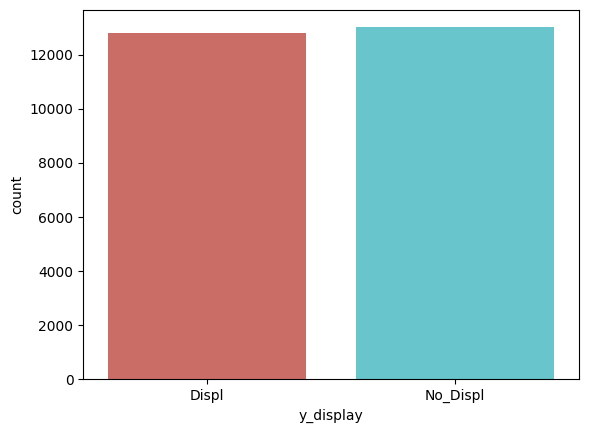

In [11]:
# visualisation
sns.countplot(x='y_display', data=df, palette='hls')
plt.show()

- we don't have an imbalanced dataset.

In [12]:
df["X7_Feature"].value_counts()

X7_Feature
No_Feat    19495
Feat        6287
Name: count, dtype: int64

- since X7_Feature only has two categories: 'No_Feat' and 'Feat', we can use a method like label encoding to convert these categories into 0 and 1. 

In [13]:
df["X5_ENSEIGNE"].value_counts()

X5_ENSEIGNE
CARREFOUR           4629
LECLERC             4257
CASINO              3370
AUCHAN              3003
INTERMARCHE         2701
CORA                1883
CARREFOUR MARKET    1500
SUPER U             1265
SIMPLY MARKET        913
GEANT                761
MONOPRIX             732
MATCH                241
MARCHE U             153
PRISUNIC              99
HYPER U               71
ECOMARCHE             69
OTHERS                60
FRANPRIX              48
SHOPI                 27
Name: count, dtype: int64

#### Pass to explore the numerical variables

KeyboardInterrupt: 

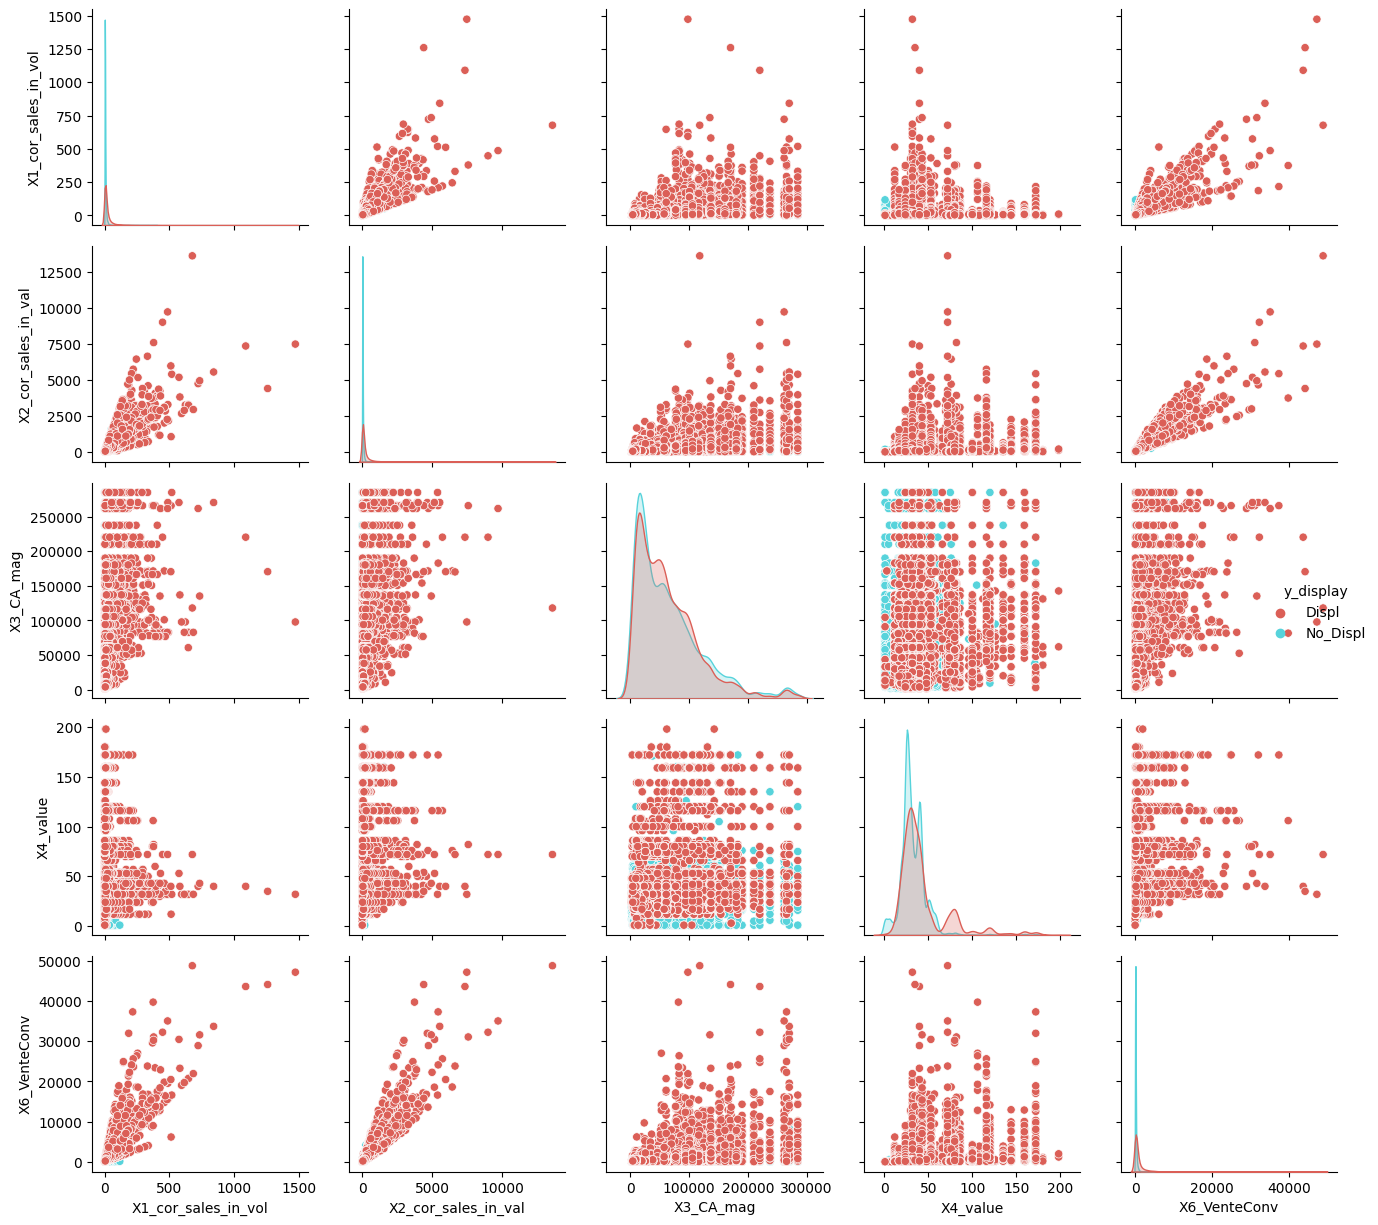

In [25]:
# pairplot between numerical variables